In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use("seaborn-v0_8")

In [110]:
csv_path = r"C:\Users\Divyansh\Music\DATA ANALYST PROJECT\new folder\dataset\netflix_powerbi_large_dataset.csv"

df = pd.read_csv(csv_path)
df.head()

show_id     type    title           director              cast      country  \
0      s1    Movie  Title 1  Christopher Nolan  Actor C, Actor D       Canada   
1      s2  TV Show  Title 2  Christopher Nolan  Actor A, Actor B  South Korea   
2      s3  TV Show  Title 3      David Fincher  Actor G, Actor H       Canada   
3      s4    Movie  Title 4  Christopher Nolan  Actor C, Actor D        India   
4      s5    Movie  Title 5            Unknown  Actor C, Actor D        Japan   

   date_added  release_year rating duration listed_in  \
0  2017-08-30          2012      G  120 min  Thriller   
1  2017-07-04          2005  TV-PG   95 min    Action   
2  2021-11-30          2007  TV-MA   90 min    Comedy   
3  2018-12-08          2008     PG  100 min     Drama   
4  2016-08-09          1991     PG   90 min    Action   

                         description  
0  This is a description for title 1  
1  This is a description for title 2  
2  This is a description for title 3  
3  This is a description for title 4  
4  This is a description for title 5

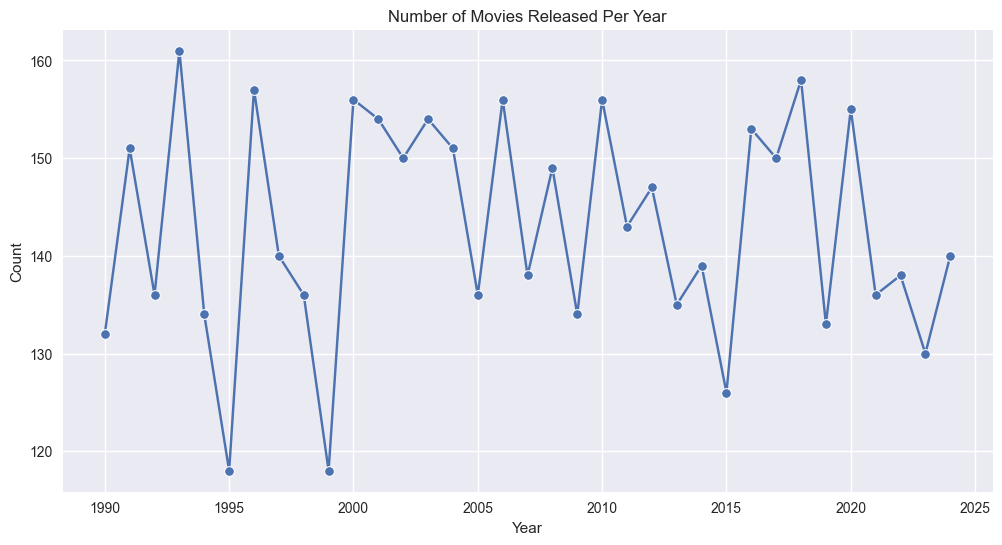

In [111]:
movies_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker="o")
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\4102442611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


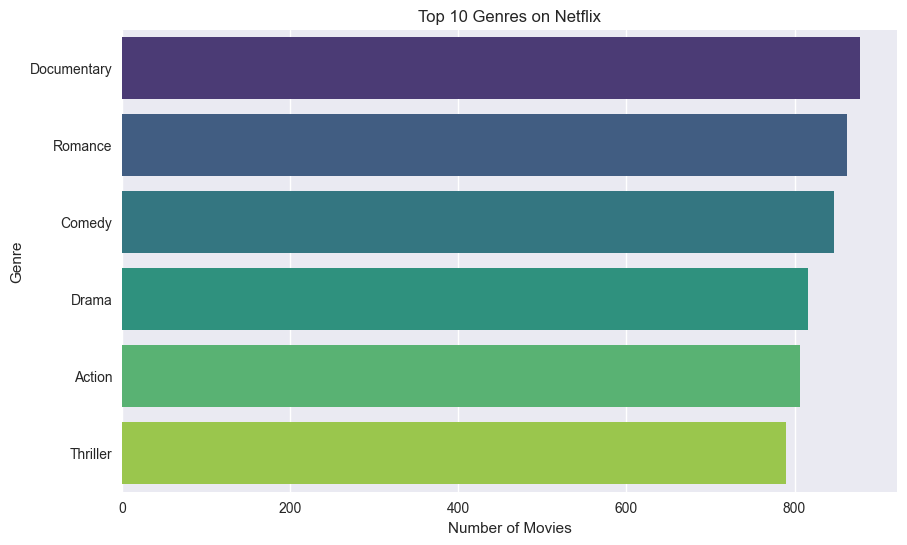

In [112]:
all_genres = df['listed_in'].astype(str).str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

<>:5: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:5: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\335784628.py:5: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df["duration_min"] = df["duration"].str.extract("(\d+)").astype(int)


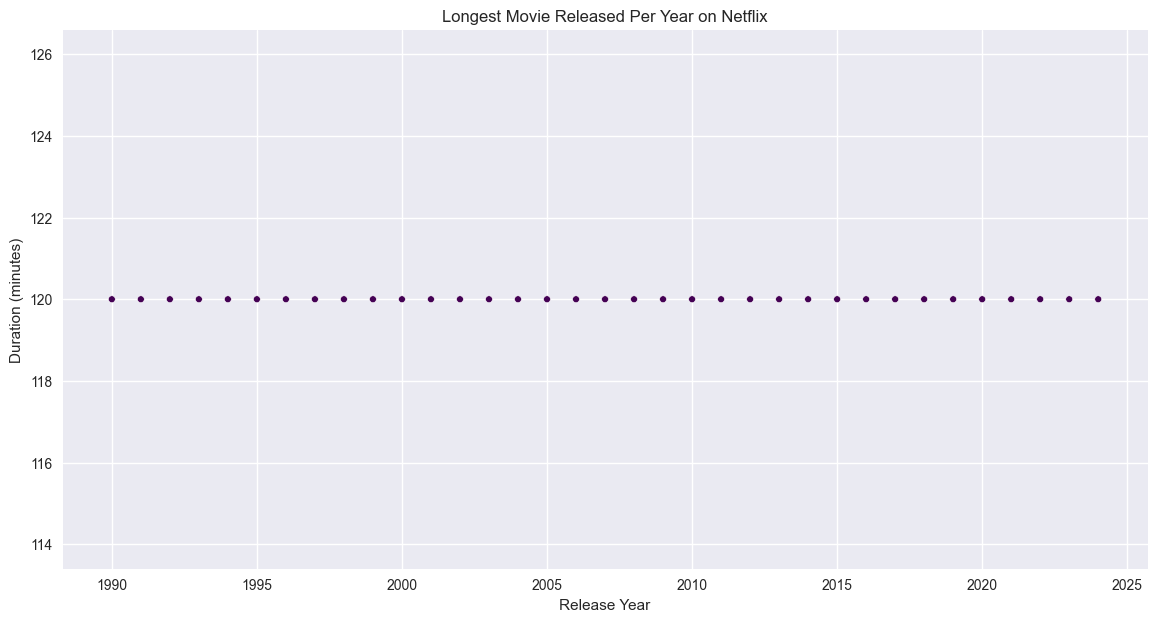

release_year      title  duration_min
603          1990  Title 604           120
354          1991  Title 355           120
799          1992  Title 800           120
357          1993  Title 358           120
258          1994  Title 259           120
183          1995  Title 184           120
20           1996   Title 21           120
115          1997  Title 116           120
281          1998  Title 282           120
292          1999  Title 293           120
42           2000   Title 43           120
76           2001   Title 77           120
43           2002   Title 44           120
92           2003   Title 93           120
316          2004  Title 317           120

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert duration to numeric minutes
df["duration_min"] = df["duration"].str.extract("(\d+)").astype(int)

# Drop rows with missing release_year
df_clean = df.dropna(subset=["release_year"])

# Make release_year integer
df_clean["release_year"] = df_clean["release_year"].astype(int)

# Get longest movie per year
longest_movies = (
    df_clean
    .loc[df_clean.groupby("release_year")["duration_min"].idxmax()]
    .sort_values("release_year")
)

# Plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=longest_movies,
    x="release_year",
    y="duration_min",
    size="duration_min",
    hue="duration_min",
    palette="viridis",
    legend=False
)

plt.title("Longest Movie Released Per Year on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.show()

# Display table
longest_movies[["release_year", "title", "duration_min"]].head(15)

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\1913371839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")


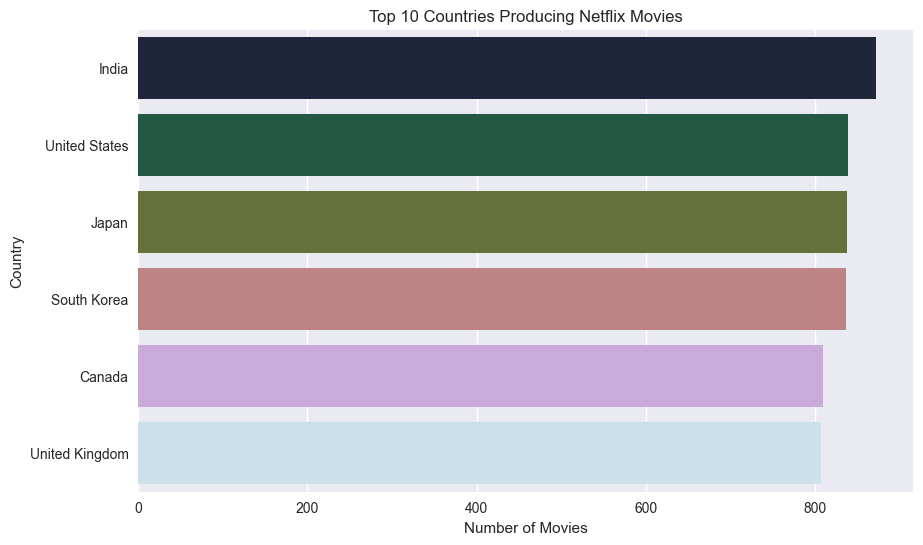

In [114]:
all_countries = df['country'].astype(str).str.split(',').explode().str.strip()
top_countries = all_countries.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")
plt.title("Top 10 Countries Producing Netflix Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()


C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\1834818818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="crest")


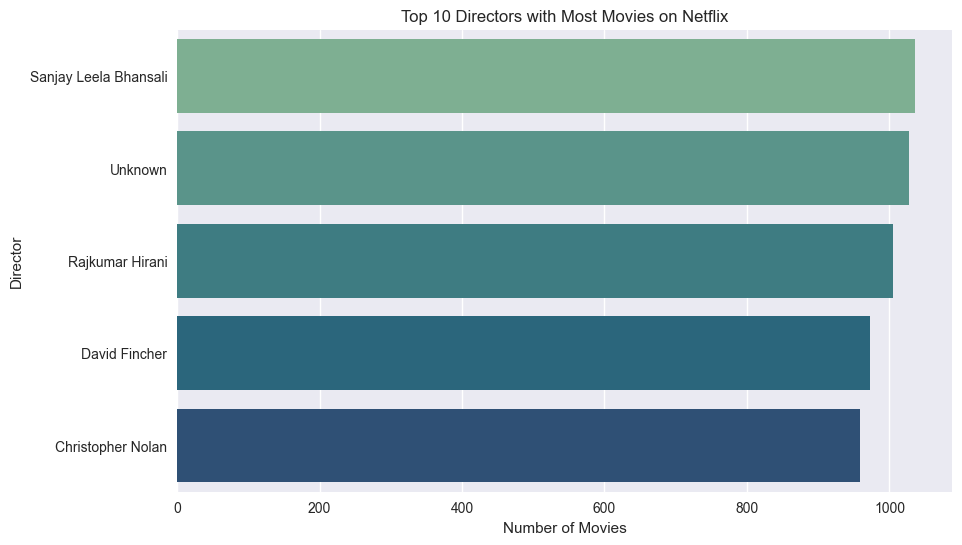

In [115]:
top_directors = df['director'].astype(str).str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="crest")
plt.title("Top 10 Directors with Most Movies on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\2659158625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")


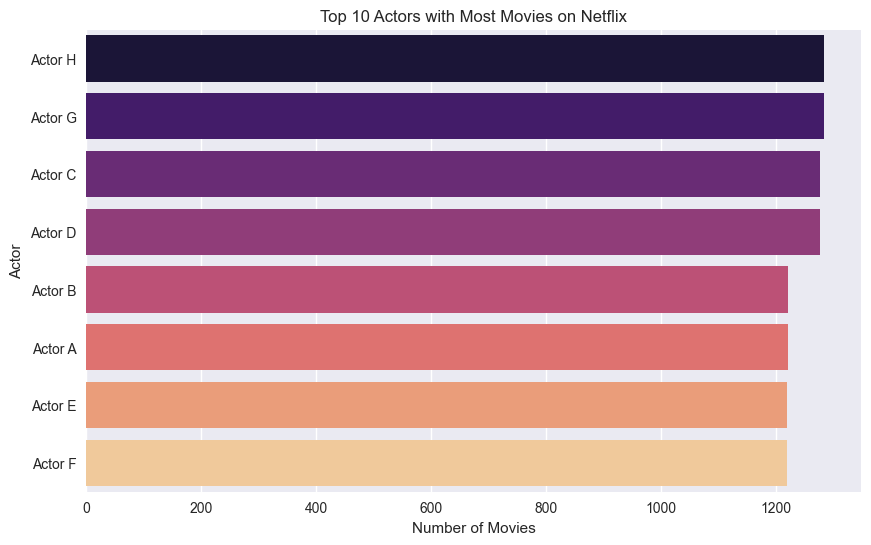

In [116]:
top_actors = df['cast'].astype(str).str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")
plt.title("Top 10 Actors with Most Movies on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.show()


<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\2738545176.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df["duration_min"] = df["duration"].str.extract("(\d+)").astype(int)


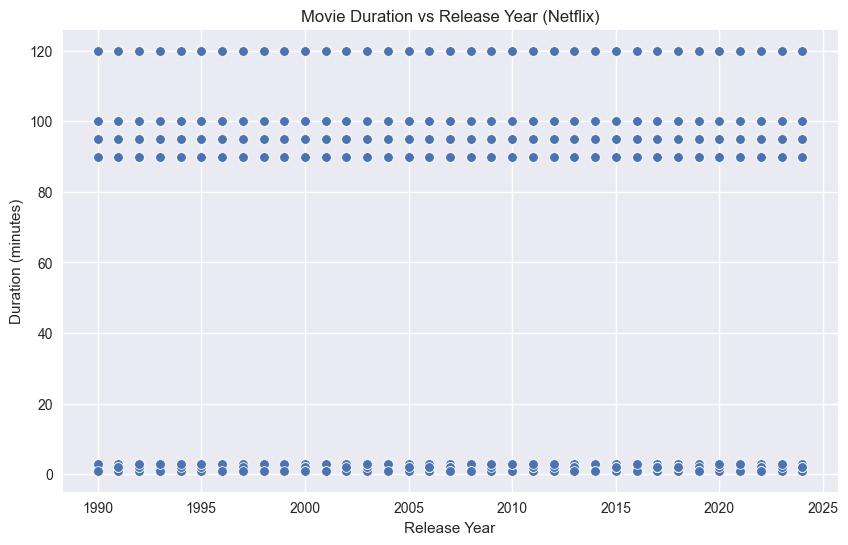

In [119]:
df["duration_min"] = df["duration"].str.extract("(\d+)").astype(int)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df[df["type"]=="Movie"],
    x="release_year",
    y="duration_min"
)

plt.title("Movie Duration vs Release Year (Netflix)")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.show()

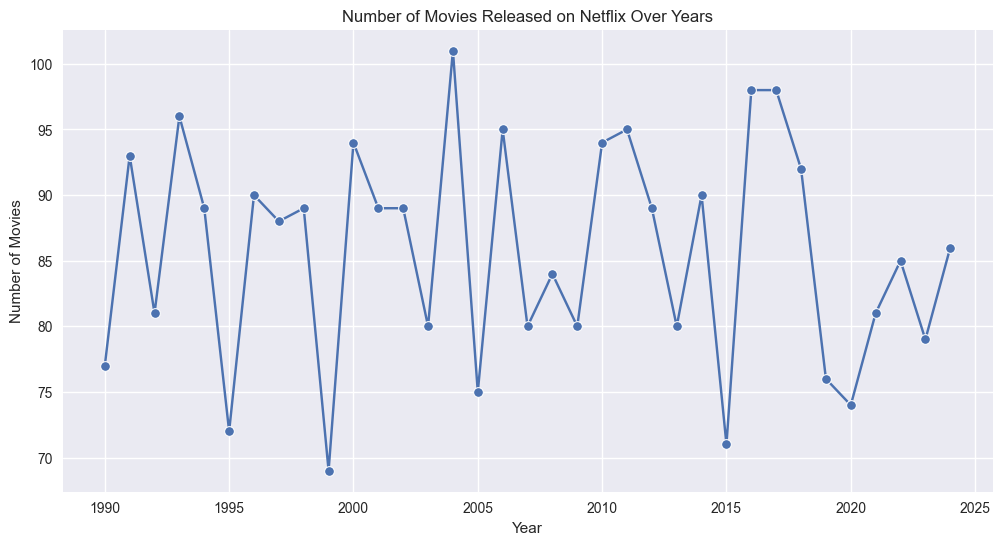

In [122]:
movies_per_year = df[df["type"]=="Movie"].groupby("release_year").size()

plt.figure(figsize=(12,6))
sns.lineplot(
    x=movies_per_year.index,
    y=movies_per_year.values,
    marker="o"
)

plt.title("Number of Movies Released on Netflix Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\3582711070.py:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df["duration_min"] = df["duration"].str.extract("(\d+)").astype(int)
C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\3582711070.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


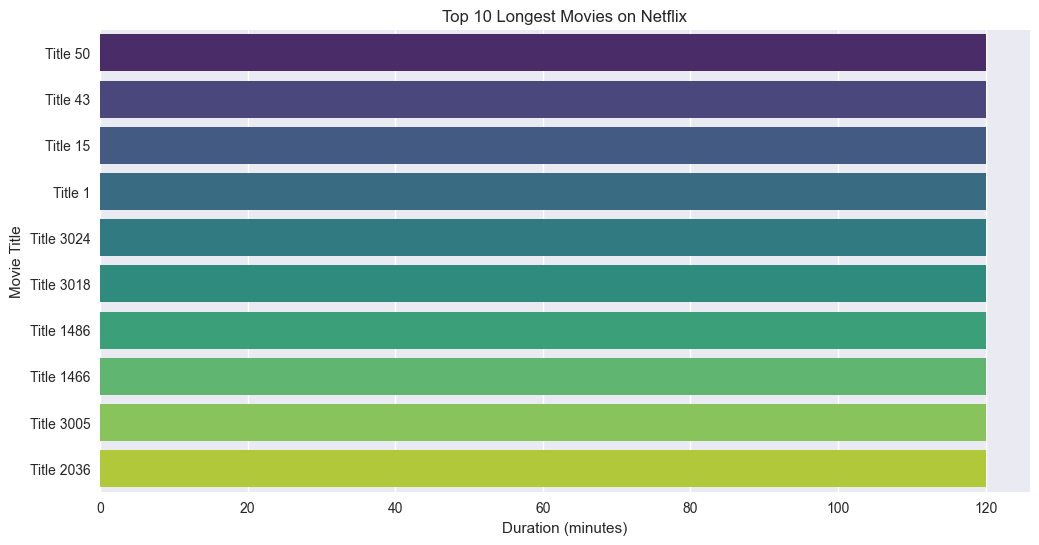

In [124]:
# duration ko number me convert
df["duration_min"] = df["duration"].str.extract("(\d+)").astype(int)

# sirf movies
movies = df[df["type"] == "Movie"]

# top 10 longest movies
top_longest = movies.sort_values("duration_min", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_longest["duration_min"],
    y=top_longest["title"],
    palette="viridis"
)

plt.title("Top 10 Longest Movies on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Movie Title")
plt.show()

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_3928\50437146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rating.values, y=top_rating.index, palette="Set2")


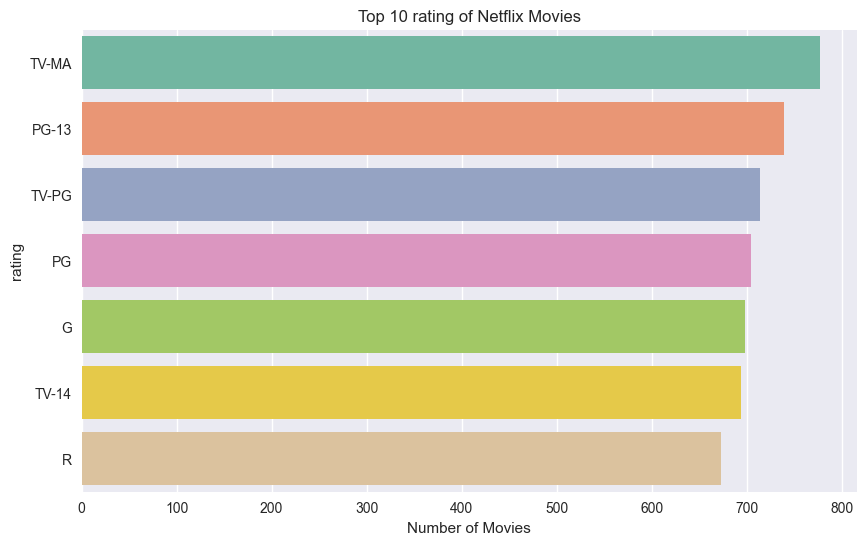

In [130]:
top_rating = df['rating'].astype(str).str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rating.values, y=top_rating.index, palette="Set2")
plt.title("Top 10 rating of Netflix Movies")
plt.xlabel("Number of Movies")
plt.ylabel("rating")
plt.show()